In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

Punto a

In [49]:
class MyRandom():
    
    def __init__(self, seed = 15, method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no reconocido')
            
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        
        array = np.zeros(Npoints)
            
        for i in range(Npoints):
            array[i] = rand.Random()
        
        ck=np.zeros(Npoints)
        for i in range(Npoints):
            if i+moment < Npoints:
                ck[i]=array[i]*array[i+moment]
            
        return np.mean(ck)

In [55]:
setname = 'drand48'
moment=20
Npoints=1e3

rand = MyRandom(seed = 16, method=setname)

correlation_drand48 = np.zeros(moment)
moments = np.arange(moment)
for k in tqdm(moments):    
    ck=rand.TestMethod(int(Npoints),k+1,45,setname)
    correlation_drand48[k]=ck

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 142.84it/s]


In [56]:
setname = 'simple'
moment=20
Npoints=1e3

rand = MyRandom(seed = 16, method=setname)

correlation_simple = np.zeros(moment)
moments = np.arange(moment)
for k in tqdm(moments):    
    ck=rand.TestMethod(int(Npoints),k+1,45,setname)
    correlation_simple[k]=ck

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 126.65it/s]


Punto b

Text(0.5, 1.0, 'dran48')

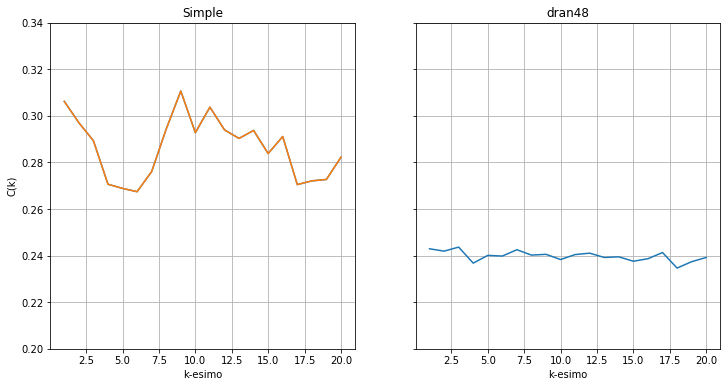

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))

ax1.plot(moments+1,correlation_simple)
ax1.grid()
ax1.set_ylim(0.20,0.34)
ax1.set_ylabel("C(k)")
ax1.set_xlabel("k-esimo")
ax1.set_title("Simple")
ax2.plot(moments+1,correlation_drand48)
ax1.plot(moments+1,correlation_simple)
ax2.grid()
ax2.set_xlabel("k-esimo")
ax2.set_title("dran48")

Dado que para tener ser un buen generador, se debe tener una correlación cercana a 0.25, se ve que el "drand48" es mejor generador que "Simple". La correlación de "Simple" no es uniforme alrededor de ningún punto.

Datos de C++

Text(0.5, 1.0, 'dran48')

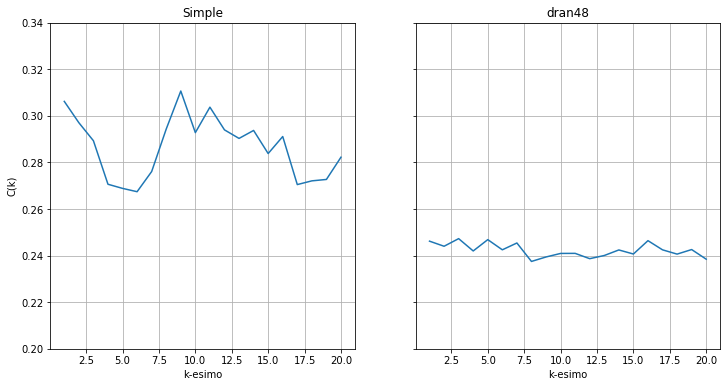

In [86]:
drand48=np.loadtxt("drand48.dat")
simple=np.loadtxt("simple.dat")
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))

ax1.plot(moments+1,correlation_simple)
ax1.grid()
ax1.set_ylim(0.20,0.34)
ax1.set_ylabel("C(k)")
ax1.set_xlabel("k-esimo")
ax1.set_title("Simple")
ax2.plot(moments+1,drand48)
ax1.plot(moments+1,simple)
ax2.grid()
ax2.set_xlabel("k-esimo")
ax2.set_title("dran48")